# Prevalence and Disorder

In [1]:
import pandas as pd

Disorder_prevalence = pd.read_excel('.\Prevalence_Disorder\Disorder_prevalence.xlsx', index_col=None)
Prevalence = pd.read_excel('.\Prevalence_Disorder\Prevalence.xlsx', index_col=None)

In [2]:
Disorder_prevalence.head()

,Disorder_id,Disorder_name,Disorder_id_2,Disorder_type,Disorder_type_id,Disorder_group,Disorder_group_id
0,1,"Multiple epiphyseal dysplasia, Al-Gazali type",17601,Disease,21394,Disorder,36547
1,2,Alexander disease,2,Disease,21394,Disorder,36547
2,3,"Multiple epiphyseal dysplasia, with miniepiphyses",17603,Disease,21394,Disorder,36547
3,4,Alpha-mannosidosis,3,Disease,21394,Disorder,36547
4,5,"Multiple epiphyseal dysplasia, with severe pro...",17602,Disease,21394,Disorder,36547


In [3]:
Disorder_prevalence.dtypes

Disorder_id           int64
Disorder_name        object
Disorder_id_2         int64
Disorder_type        object
Disorder_type_id      int64
Disorder_group       object
Disorder_group_id     int64
dtype: object

In [4]:
dis_name = Disorder_prevalence[['Disorder_id', 'Disorder_name']]
dis_name

,Disorder_id,Disorder_name
0,1,"Multiple epiphyseal dysplasia, Al-Gazali type"
1,2,Alexander disease
2,3,"Multiple epiphyseal dysplasia, with miniepiphyses"
3,4,Alpha-mannosidosis
4,5,"Multiple epiphyseal dysplasia, with severe pro..."
...,...,...
6032,6033,Dentin dysplasia type II
6033,6034,Dentin dysplasia-sclerotic bones syndrome
6034,6035,Cleft velum
6035,6036,Bifid uvula


In [5]:
Prevalence.head()

,Prevalence_id,Disorder_id,Prevalence_id.1,Prevalence_type,Prevalence_type_id,Prevalence_qualification,Prevalence_qualification_id,Prevalence_class,Prevalence_class_id,ValMoy,Prevalence_geo,Prevalence_geo_id,Prevalence_validation_status,Prevalence_validation_status_id
0,1,1,8322,Cases/families,23697,Case,23718,NaN,NaN,4.000,Worldwide,23844,Validated,25958
1,2,1,8323,Point prevalence,23669,Class only,23704,<1 / 1 000 000,23760.0,0.000,Worldwide,23844,Validated,25958
2,3,2,2,Annual incidence,23676,Value and class,23711,<1 / 1 000 000,23760.0,0.037,Japan,24621,Validated,25958
3,4,2,3,Point prevalence,23669,Class only,23704,Unknown,23774.0,0.000,Worldwide,23844,Not yet validated,25965
4,5,3,11632,Cases/families,23697,Case,23718,NaN,NaN,2.000,Worldwide,23844,Validated,25958


In [6]:
Prevalence.dtypes

Prevalence_id                        int64
Disorder_id                          int64
Prevalence_id.1                      int64
Prevalence_type                     object
Prevalence_type_id                   int64
Prevalence_qualification            object
Prevalence_qualification_id          int64
Prevalence_class                    object
Prevalence_class_id                float64
ValMoy                             float64
Prevalence_geo                      object
Prevalence_geo_id                    int64
Prevalence_validation_status        object
Prevalence_validation_status_id      int64
dtype: object

## Merge prevalence and Disorder

In [7]:
Prevalence = Prevalence.merge(Disorder_prevalence, on='Disorder_id', how='left', indicator=True)

In [8]:
Prevalence.Prevalence_type.value_counts()

Point prevalence       7352
Cases/families         3196
Annual incidence       2868
Prevalence at birth    1969
Lifetime Prevalence      46
Name: Prevalence_type, dtype: int64

In [9]:
Prevalence.Prevalence_qualification.value_counts()

Value and class    6537
Class only         5698
Case               2818
Family              378
Name: Prevalence_qualification, dtype: int64

In [10]:
Prevalence.Prevalence_class.value_counts()

<1 / 1 000 000        4428
1-9 / 100 000         2614
1-9 / 1 000 000       2057
Unknown               1763
1-5 / 10 000          1166
6-9 / 10 000           106
>1 / 1000               99
Not yet documented       2
Name: Prevalence_class, dtype: int64

In [11]:
dis_prev_class = Prevalence[['Disorder_id', 'Prevalence_class']]
dis_prev_class = dis_prev_class[dis_prev_class['Prevalence_class'] != 'Unknown']
dis_prev_class = dis_prev_class[dis_prev_class['Prevalence_class'] != 'Not yet documented']
dis_prev_class = dis_prev_class.dropna()
dis_prev_class

,Disorder_id,Prevalence_class
1,1,<1 / 1 000 000
2,2,<1 / 1 000 000
5,3,<1 / 1 000 000
6,4,1-9 / 1 000 000
7,4,<1 / 1 000 000
...,...,...
15422,6032,1-9 / 100 000
15424,6033,<1 / 1 000 000
15426,6034,<1 / 1 000 000
15427,6035,1-5 / 10 000


In [12]:
Prevalence.Prevalence_geo.value_counts()

Worldwide           8225
Europe              1732
United States        409
United Kingdom       345
France               265
                    ... 
Guyana                 1
Greenland              1
French Polynesia       1
Uganda                 1
Lesotho                1
Name: Prevalence_geo, Length: 133, dtype: int64

In [13]:
Prevalence.Prevalence_validation_status.value_counts()

Validated            13371
Not yet validated     2060
Name: Prevalence_validation_status, dtype: int64

## Let's filter so that we have just validated data

In [14]:
Val_Prevalence = Prevalence[Prevalence['Prevalence_validation_status'] == 'Validated']

# Comparison between countries

### Countries and the rest of the world

To do the same we did for Canada to other countries, let's take the "validated data".

In [15]:
Val_Prevalence.columns

Index(['Prevalence_id', 'Disorder_id', 'Prevalence_id.1', 'Prevalence_type',
       'Prevalence_type_id', 'Prevalence_qualification',
       'Prevalence_qualification_id', 'Prevalence_class',
       'Prevalence_class_id', 'ValMoy', 'Prevalence_geo', 'Prevalence_geo_id',
       'Prevalence_validation_status', 'Prevalence_validation_status_id',
       'Disorder_name', 'Disorder_id_2', 'Disorder_type', 'Disorder_type_id',
       'Disorder_group', 'Disorder_group_id', '_merge'],
      dtype='object')

In [16]:
Val_Prevalence.Prevalence_type.value_counts()

Point prevalence       5571
Cases/families         3195
Annual incidence       2737
Prevalence at birth    1822
Lifetime Prevalence      46
Name: Prevalence_type, dtype: int64

Let's remove 'Lifetime Prevalence' and 'Cases/families' because not consistents

In [17]:
Val_Prevalence = Val_Prevalence[Val_Prevalence['Prevalence_type'] != 'Lifetime Prevalence']
Val_Prevalence = Val_Prevalence[Val_Prevalence['Prevalence_type'] != 'Cases/families']

This is the dataset for the World. We need to specify Prevalence first and remove Worldwide

In [18]:
df_W = Val_Prevalence[Val_Prevalence['Prevalence_type'] == 'Annual incidence']
df_W = df_W[df_W['Prevalence_geo'] != 'Worldwide']
df_W.sort_values(by=['Disorder_id', 'ValMoy'])
df_W = df_W.groupby(["Disorder_id", 'Disorder_name', 'Prevalence_type'], as_index=False)["ValMoy"].mean()
df_W = df_W[['Prevalence_type', 'Disorder_name', 'Disorder_id', 'ValMoy']]
df_W.rename({"ValMoy": "ValMoy_world_avg"}, axis='columns', inplace =True)
df_W.sort_values(by=['Disorder_id'], ascending = True)


,Prevalence_type,Disorder_name,Disorder_id,ValMoy_world_avg
0,Annual incidence,Alexander disease,2,0.037000
1,Annual incidence,Canavan disease,11,7.000000
2,Annual incidence,Paroxysmal nocturnal hemoglobinuria,31,0.130000
3,Annual incidence,Rare cutaneous lupus erythematosus,34,4.150000
4,Annual incidence,Poliomyelitis,50,0.000000
...,...,...,...,...
511,Annual incidence,Malignant dysgerminomatous germ cell tumor of ...,5995,0.040000
512,Annual incidence,Spermatocytic seminoma,6006,0.030000
513,Annual incidence,Thymoma,6008,0.140000
514,Annual incidence,Yellow fever,6018,0.000000


This for the country to compare. We need to input the same Prevalence and the Name of the Country

In [19]:
df_a = Val_Prevalence[Val_Prevalence['Prevalence_type'] == 'Annual incidence']
df_a = df_a[df_a['Prevalence_geo'] == 'Canada']
df_a.sort_values(by=['Disorder_id', 'ValMoy'])
df_a = df_a[['Disorder_id','Prevalence_geo','ValMoy']]
df_a.rename({"ValMoy": "ValMoy_Country"}, axis='columns', inplace =True)
df_a

,Disorder_id,Prevalence_geo,ValMoy_Country
245,59,Canada,27.70
488,96,Canada,0.69
619,109,Canada,12.50
1157,240,Canada,1.63
2051,489,Canada,0.48
2501,551,Canada,0.71
2524,552,Canada,0.46
2987,648,Canada,0.90
3152,674,Canada,3.00
12231,4674,Canada,11.00


This is the final table. In this case we have the annual incidence of rare disease of Canada VS the world

In [20]:
df_comp = df_W.merge(df_a, on='Disorder_id', how='left')
df_comp['ValMoy_diff'] = df_comp['ValMoy_world_avg'] - df_comp['ValMoy_Country']

# sort by diff and delete na
df_comp = df_comp.dropna()  # if we want to delete NA
df_comp = df_comp.sort_values(by=['ValMoy_diff'], ascending = False)
df_comp

# I can add a column with the name of the country if you want. TO do it, just add
# the prevalence_Geo in this chunk above
# df_a = df_a[['Disorder_id', 'ValMoy']]

,Prevalence_type,Disorder_name,Disorder_id,ValMoy_world_avg,Prevalence_geo,ValMoy_Country,ValMoy_diff
16,Annual incidence,Rheumatic fever,109,34.075000,Canada,12.50,21.575000
405,Annual incidence,Hepatocellular carcinoma,5022,10.412515,Canada,5.00,5.412515
8,Annual incidence,Cystic fibrosis,59,31.160000,Canada,27.70,3.460000
63,Annual incidence,Microscopic polyangiitis,551,1.004167,Canada,0.71,0.294167
64,Annual incidence,Granulomatosis with polyangiitis,552,0.674071,Canada,0.46,0.214071
398,Annual incidence,Spinal cord injury,4975,3.570000,Canada,3.57,0.000000
445,Annual incidence,La Crosse encephalitis,5455,1.910000,Canada,1.91,0.000000
80,Annual incidence,Primary sclerosing cholangitis,648,0.793333,Canada,0.90,-0.106667
48,Annual incidence,Sporadic Creutzfeldt-Jakob disease,489,0.236667,Canada,0.48,-0.243333
14,Annual incidence,Huntington disease,96,0.293600,Canada,0.69,-0.396400


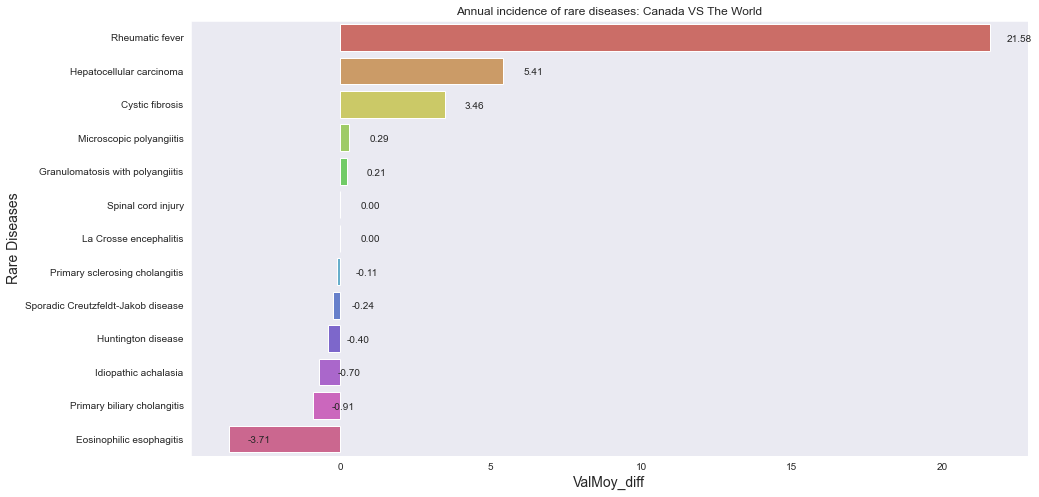

In [21]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
 
plt.figure(figsize=(15,8))

sns.set_style('dark')
e = sns.barplot(x = "ValMoy_diff", y = "Disorder_name", data = df_comp, palette = 'hls')

for p in e.patches:
    width = p.get_width()
    plt.text(1+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

plt.xlabel("ValMoy_diff", size=14)
plt.ylabel("Rare Diseases", size=14) 
plt.title('Annual incidence of rare diseases: Canada VS The World')

plt.show()

Canada Prevalence at birth VS the world

In [22]:
df_W = Val_Prevalence[Val_Prevalence['Prevalence_type'] == 'Prevalence at birth']
df_W = df_W[df_W['Prevalence_geo'] != 'Worldwide']
df_W.sort_values(by=['Disorder_id', 'ValMoy'])
df_W = df_W.groupby(["Disorder_id", 'Disorder_name', 'Prevalence_type'], as_index=False)["ValMoy"].mean()
df_W = df_W[['Prevalence_type', 'Disorder_name', 'Disorder_id', 'ValMoy']]
df_W.rename({"ValMoy": "ValMoy_world_avg"}, axis='columns', inplace =True)
df_W.sort_values(by=['Disorder_id'], ascending = True)


df_a = Val_Prevalence[Val_Prevalence['Prevalence_type'] == 'Prevalence at birth']
df_a = df_a[df_a['Prevalence_geo'] == 'Canada']
df_a.sort_values(by=['Disorder_id', 'ValMoy'])
df_a = df_a[['Disorder_id', 'ValMoy']]
df_a.rename({"ValMoy": "ValMoy_Country"}, axis='columns', inplace =True)
df_a


df_comp = df_W.merge(df_a, on='Disorder_id', how='left')
df_comp['ValMoy_diff'] = df_comp['ValMoy_world_avg'] - df_comp['ValMoy_Country']

# sort by diff and delete na
df_comp = df_comp.dropna()  # if we want to delete NA
df_comp = df_comp.sort_values(by=['ValMoy_diff'], ascending = False)
df_comp

,Prevalence_type,Disorder_name,Disorder_id,ValMoy_world_avg,ValMoy_Country,ValMoy_diff
57,Prevalence at birth,Cystinuria,162,15.900000,8.00,7.900000
180,Prevalence at birth,Tay-Sachs disease,661,3.419000,0.29,3.129000
243,Prevalence at birth,Isolated split hand-split foot malformation,1478,7.780000,5.10,2.680000
292,Prevalence at birth,Medium chain acyl-CoA dehydrogenase deficiency,2517,6.180000,4.30,1.880000
8,Prevalence at birth,Mucopolysaccharidosis type 6,38,0.653110,0.10,0.553110
35,Prevalence at birth,Mucopolysaccharidosis type 2,112,0.651905,0.10,0.551905
148,Prevalence at birth,Mucopolysaccharidosis type 3,497,0.813684,0.29,0.523684
44,Prevalence at birth,Ornithine transcarbamylase deficiency,130,1.388000,0.88,0.508000
36,Prevalence at birth,Mucopolysaccharidosis type 1,113,0.970000,0.58,0.390000
439,Prevalence at birth,Duchenne muscular dystrophy,5760,10.880000,10.50,0.380000


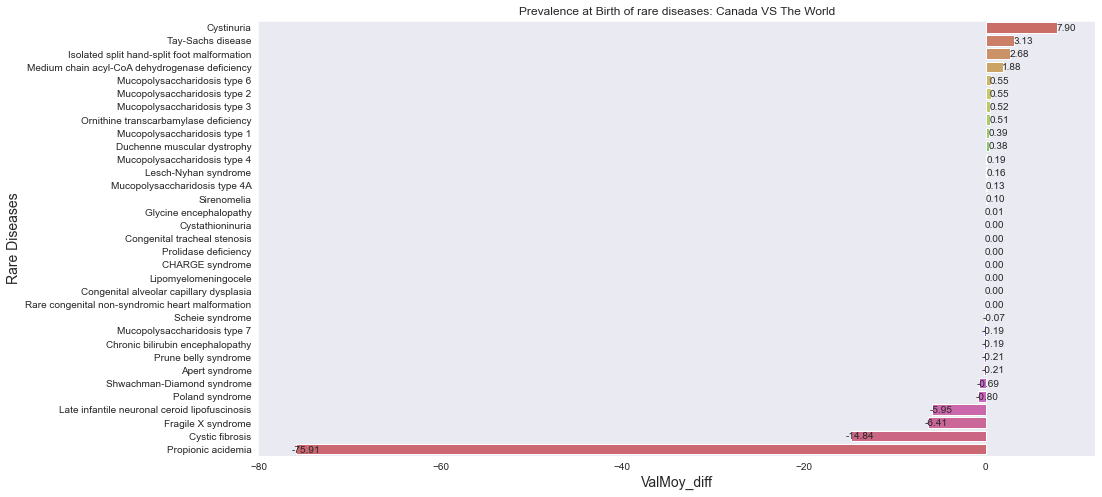

In [23]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
 
plt.figure(figsize=(15,8))

w = sns.barplot(x = "ValMoy_diff", y = "Disorder_name", data = df_comp, palette = 'hls')

for p in w.patches:
    width = p.get_width()
    plt.text(1+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

plt.xlabel("ValMoy_diff", size=14)
plt.ylabel("Rare Diseases", size=14) 
plt.title('Prevalence at Birth of rare diseases: Canada VS The World')

plt.show()

Point Prevalence of Canada VS the world

In [24]:
df_W = Val_Prevalence[Val_Prevalence['Prevalence_type'] == 'Point prevalence']
df_W = df_W[df_W['Prevalence_geo'] != 'Worldwide']
df_W.sort_values(by=['Disorder_id', 'ValMoy'])
df_W = df_W.groupby(["Disorder_id", 'Disorder_name', 'Prevalence_type'], as_index=False)["ValMoy"].mean()
df_W = df_W[['Prevalence_type', 'Disorder_name', 'Disorder_id', 'ValMoy']]
df_W.rename({"ValMoy": "ValMoy_world_avg"}, axis='columns', inplace =True)
df_W.sort_values(by=['Disorder_id'], ascending = True)


df_a = Val_Prevalence[Val_Prevalence['Prevalence_type'] == 'Point prevalence']
df_a = df_a[df_a['Prevalence_geo'] == 'Canada']
df_a.sort_values(by=['Disorder_id', 'ValMoy'])
df_a = df_a[['Disorder_id', 'ValMoy']]
df_a.rename({"ValMoy": "ValMoy_Country"}, axis='columns', inplace =True)
df_a


df_comp = df_W.merge(df_a, on='Disorder_id', how='left')
df_comp['ValMoy_diff'] = df_comp['ValMoy_world_avg'] - df_comp['ValMoy_Country']

# sort by diff and delete na
df_comp = df_comp.dropna()  # if we want to delete NA
df_comp = df_comp.sort_values(by=['ValMoy_diff'], ascending = False)
df_comp

,Prevalence_type,Disorder_name,Disorder_id,ValMoy_world_avg,ValMoy_Country,ValMoy_diff
195,Point prevalence,Sarcoidosis,577,33.041250,10.50,22.541250
66,Point prevalence,Neurofibromatosis type 1,143,23.493333,6.70,16.793333
482,Point prevalence,Mucopolysaccharidosis type 4A,3479,3.176600,0.15,3.026600
397,Point prevalence,Quebec platelet disorder,2652,0.300000,0.15,0.150000
400,Point prevalence,Lymphangioleiomyomatosis,2673,0.254444,0.21,0.044444
83,Point prevalence,BOR syndrome,178,2.500000,2.50,0.000000
398,Point prevalence,Cystathioninuria,2666,7.100000,7.10,0.000000
35,Point prevalence,Amyotrophic lateral sclerosis,93,4.680000,4.90,-0.220000
100,Point prevalence,Apert syndrome,213,0.942500,1.47,-0.527500
90,Point prevalence,Crouzon disease,191,0.825000,1.65,-0.825000


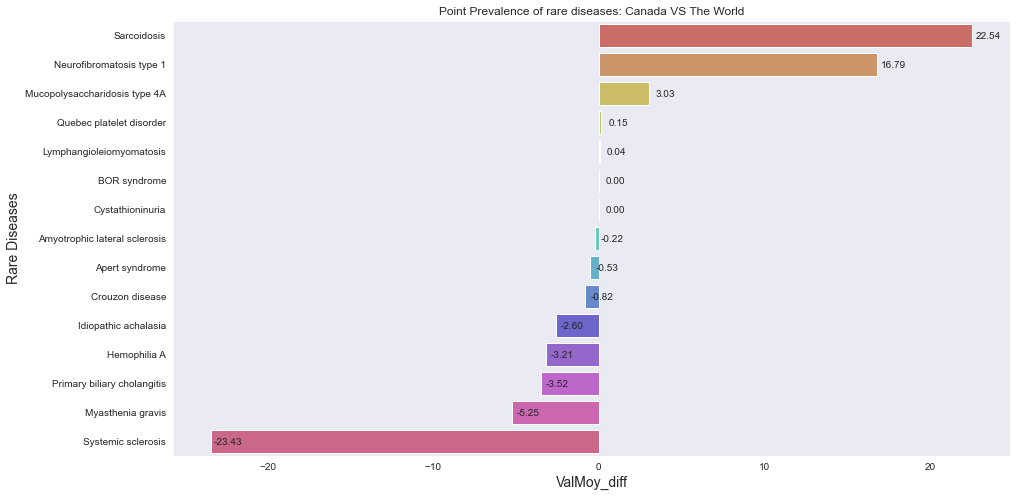

In [25]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
 
plt.figure(figsize=(15,8))

q = sns.barplot(x = "ValMoy_diff", y = "Disorder_name", data = df_comp, palette = 'hls')

for p in q.patches:
    width = p.get_width()
    plt.text(1+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

plt.xlabel("ValMoy_diff", size=14)
plt.ylabel("Rare Diseases", size=14) 
plt.title('Point Prevalence of rare diseases: Canada VS The World')

plt.show()

# Country VS Country

For comparisons, we needcountries with at least 10 rare diseases. Here is our df with the countries we want

In [26]:
Country = pd.DataFrame(Val_Prevalence.Prevalence_geo.value_counts())
Country = Country.reset_index()
Country = Country.rename(columns = {'index':'Country','Prevalence_geo':'count_rd' })
Country = Country[Country['count_rd'] > 10]
Country

,Country,count_rd
0,Worldwide,3812
1,Europe,1134
2,United States,346
3,United Kingdom,311
4,France,248
5,Italy,231
6,Netherlands,204
7,Spain,201
8,Germany,200
9,Norway,186


Now we filter the validated dataset

In [27]:
Country_comp = Val_Prevalence[Val_Prevalence['Prevalence_geo'].isin(Country.Country)]

We need to specify prevalence and geography for both df_a and b

In [28]:
df_a = Country_comp[Country_comp['Prevalence_type'] == 'Annual incidence']
df_a = df_a[df_a['Prevalence_geo'] == 'Canada']
df_a.sort_values(by=['Disorder_id', 'ValMoy'])
df_a = df_a[['Prevalence_type','Disorder_name', 'Disorder_id', 'Prevalence_geo', 'ValMoy']]
df_a.rename({"ValMoy": "ValMoy_Country_a", 'Prevalence_geo':'Country_a'}, axis='columns', inplace =True)
df_a

df_b = Country_comp[Country_comp['Prevalence_type'] == 'Annual incidence']
df_b = df_b[df_b['Prevalence_geo'] == 'Spain']
df_b.sort_values(by=['Prevalence_geo', 'Disorder_id', 'ValMoy'])
df_b = df_b[['Disorder_id','Prevalence_geo', 'ValMoy']]
df_b.rename({"ValMoy": "ValMoy_Country_b", 'Prevalence_geo':'Country_b'}, axis='columns', inplace =True)
df_b


,Disorder_id,Country_b,ValMoy_Country_b
445,93,Spain,1.400
485,96,Spain,0.470
606,106,Spain,0.048
620,109,Spain,12.500
971,175,Spain,1.500
...,...,...,...
15010,5866,Spain,0.477
15157,5927,Spain,5.162
15243,5962,Spain,3.544
15274,5963,Spain,1.178


In [29]:
df_cc = df_a.merge(df_b, on='Disorder_id', how='left')
df_cc['ValMoy_diff'] = df_cc['ValMoy_Country_a'] - df_cc['ValMoy_Country_b']

# sort by diff and delete na
df_cc = df_cc.dropna()  # if we want to delete NA
df_cc = df_cc.sort_values(by=['ValMoy_diff'], ascending = False)
df_cc

,Prevalence_type,Disorder_name,Disorder_id,Country_a,ValMoy_Country_a,Country_b,ValMoy_Country_b,ValMoy_diff
8,Annual incidence,Primary biliary cholangitis,674,Canada,3.00,Spain,1.700,1.300
7,Annual incidence,Primary sclerosing cholangitis,648,Canada,0.90,Spain,0.070,0.830
1,Annual incidence,Huntington disease,96,Canada,0.69,Spain,0.470,0.220
2,Annual incidence,Rheumatic fever,109,Canada,12.50,Spain,12.500,0.000
6,Annual incidence,Granulomatosis with polyangiitis,552,Canada,0.46,Spain,0.490,-0.030
11,Annual incidence,Hepatocellular carcinoma,5022,Canada,5.00,Spain,5.212,-0.212
5,Annual incidence,Microscopic polyangiitis,551,Canada,0.71,Spain,1.160,-0.450


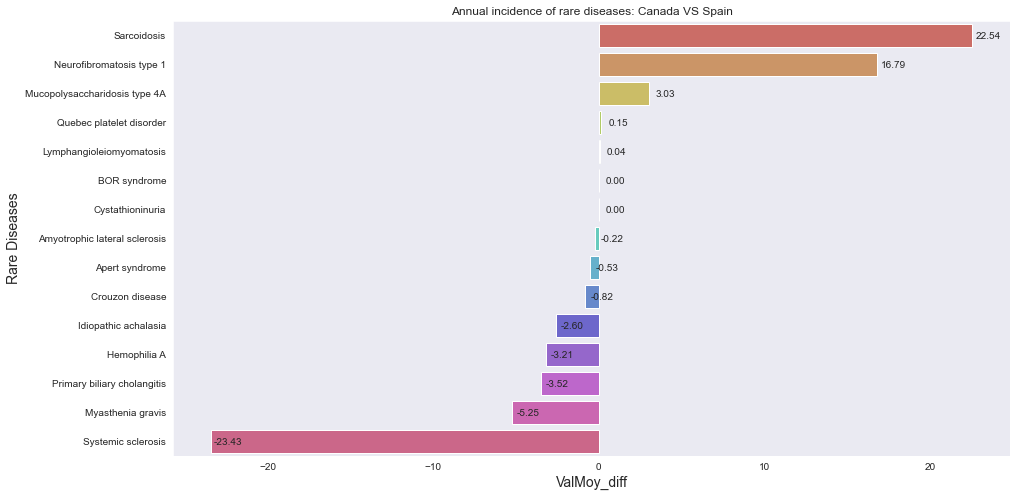

In [30]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
 
plt.figure(figsize=(15,8))

ll = sns.barplot(x = "ValMoy_diff", y = "Disorder_name", data = df_comp, palette = 'hls')

for p in ll.patches:
    width = p.get_width()
    plt.text(1+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

plt.xlabel("ValMoy_diff", size=14)
plt.ylabel("Rare Diseases", size=14) 
plt.title('Annual incidence of rare diseases: Canada VS Spain')

plt.show()

##### Now all together (comp w/ Italy)

In [31]:
Country_comp = Val_Prevalence[Val_Prevalence['Prevalence_geo'].isin(Country.Country)]

df_a = Country_comp[Country_comp['Prevalence_type'] == 'Annual incidence']
df_a = df_a[df_a['Prevalence_geo'] == 'Canada']
df_a.sort_values(by=['Disorder_id', 'ValMoy'])
df_a = df_a[['Prevalence_type','Disorder_name', 'Disorder_id', 'Prevalence_geo', 'ValMoy']]
df_a.rename({"ValMoy": "ValMoy_Country_a", 'Prevalence_geo':'Country_a'}, axis='columns', inplace =True)
df_a

df_b = Country_comp[Country_comp['Prevalence_type'] == 'Annual incidence']
df_b = df_b[df_b['Prevalence_geo'] == 'Italy']
df_b.sort_values(by=['Prevalence_geo', 'Disorder_id', 'ValMoy'])
df_b = df_b[['Disorder_id','Prevalence_geo', 'ValMoy']]
df_b.rename({"ValMoy": "ValMoy_Country_b", 'Prevalence_geo':'Country_b'}, axis='columns', inplace =True)
df_b

df_cc = df_a.merge(df_b, on='Disorder_id', how='left')
df_cc['ValMoy_diff'] = df_cc['ValMoy_Country_a'] - df_cc['ValMoy_Country_b']

# sort by diff and delete na
df_cc = df_cc.dropna()  # if we want to delete NA
df_cc = df_cc.sort_values(by=['ValMoy_diff'], ascending = False)
df_cc


,Prevalence_type,Disorder_name,Disorder_id,Country_a,ValMoy_Country_a,Country_b,ValMoy_Country_b,ValMoy_diff
0,Annual incidence,Cystic fibrosis,59,Canada,27.70,Italy,23.600,4.100
1,Annual incidence,Huntington disease,96,Canada,0.69,Italy,0.110,0.580
6,Annual incidence,Granulomatosis with polyangiitis,552,Canada,0.46,Italy,0.240,0.220
3,Annual incidence,Idiopathic achalasia,240,Canada,1.63,Italy,1.590,0.040
11,Annual incidence,Hepatocellular carcinoma,5022,Canada,5.00,Italy,9.266,-4.266


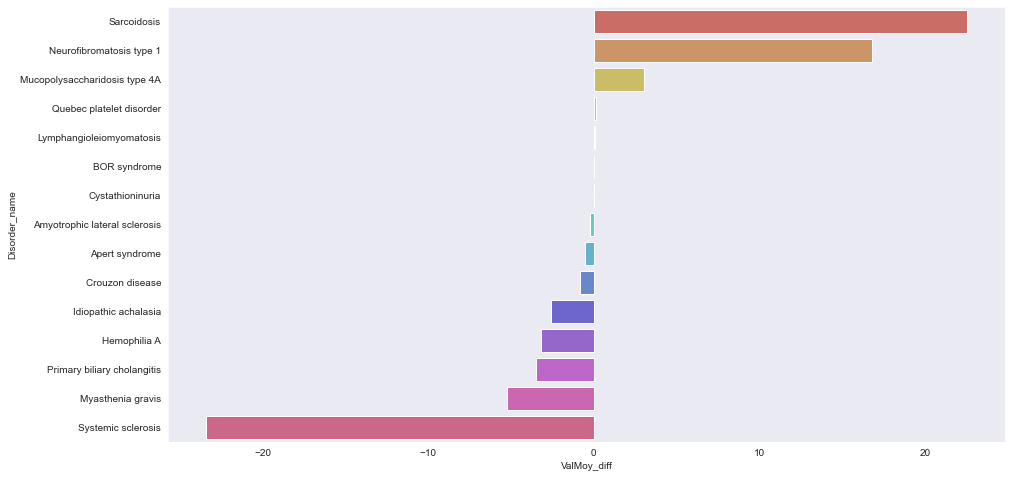

In [32]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
 
plt.figure(figsize=(15,8))

sns.barplot(x = "ValMoy_diff", y = "Disorder_name", data = df_comp, palette = 'hls')

plt.show()

# Diseases and Geography

### I took the ALS as example

Simply, you insert a disease and geographical info are displayed. All the info are in Geo_dis

In [33]:
Country_comp.columns

Index(['Prevalence_id', 'Disorder_id', 'Prevalence_id.1', 'Prevalence_type',
       'Prevalence_type_id', 'Prevalence_qualification',
       'Prevalence_qualification_id', 'Prevalence_class',
       'Prevalence_class_id', 'ValMoy', 'Prevalence_geo', 'Prevalence_geo_id',
       'Prevalence_validation_status', 'Prevalence_validation_status_id',
       'Disorder_name', 'Disorder_id_2', 'Disorder_type', 'Disorder_type_id',
       'Disorder_group', 'Disorder_group_id', '_merge'],
      dtype='object')

In [38]:
Geo_dis = Country_comp[['Prevalence_type','Disorder_name', 'Disorder_id_2', 'Prevalence_geo', 'Prevalence_class',  'ValMoy']]
Geo_dis = Geo_dis[Geo_dis['Prevalence_geo'] != 'Worldwide']
Geo_dis = Geo_dis[Geo_dis['Prevalence_geo'] != 'Specific population']
Geo_dis = Geo_dis.sort_values(by=['Disorder_id_2', 'Prevalence_type', 'ValMoy'], ascending = False)
Geo_dis = Geo_dis.reset_index()
del Geo_dis['index']
Geo_dis

,Prevalence_type,Disorder_name,Disorder_id_2,Prevalence_geo,Prevalence_class,ValMoy
0,Point prevalence,Infective endocarditis,28678,Europe,Unknown,0.000
1,Annual incidence,Infective endocarditis,28678,France,1-9 / 100 000,3.380
2,Annual incidence,Infective endocarditis,28678,Denmark,1-9 / 100 000,1.800
3,Annual incidence,Infective endocarditis,28678,Europe,1-9 / 100 000,0.000
4,Point prevalence,Ricin poisoning,28676,Europe,<1 / 1 000 000,0.000
...,...,...,...,...,...,...
5969,Prevalence at birth,Alpha-mannosidosis,3,Australia,<1 / 1 000 000,0.090
5970,Prevalence at birth,Alpha-mannosidosis,3,Netherlands,<1 / 1 000 000,0.090
5971,Prevalence at birth,Alpha-mannosidosis,3,Sweden,<1 / 1 000 000,0.070
5972,Point prevalence,Alpha-mannosidosis,3,Europe,1-9 / 1 000 000,0.100


In [41]:
Geo_dis.to_excel("Geo_dis.xlsx")  


Selecting the disease and the Prevalence. df_2 is what we want to return wen you select prevalence and disorder

In [39]:
df_2 = Geo_dis[Geo_dis['Disorder_id_2'] == 106]
df_2 = df_2[df_2['Prevalence_type'] == 'Point prevalence']
df_2

,Prevalence_type,Disorder_name,Disorder_id_2,Prevalence_geo,Prevalence_class,ValMoy
5664,Point prevalence,Amyotrophic lateral sclerosis,106,Finland,1-9 / 100 000,6.40
5665,Point prevalence,Amyotrophic lateral sclerosis,106,Spain,1-9 / 100 000,5.40
5666,Point prevalence,Amyotrophic lateral sclerosis,106,Europe,1-9 / 100 000,5.20
5667,Point prevalence,Amyotrophic lateral sclerosis,106,United Kingdom,1-9 / 100 000,4.90
5668,Point prevalence,Amyotrophic lateral sclerosis,106,Canada,1-9 / 100 000,4.90
5669,Point prevalence,Amyotrophic lateral sclerosis,106,Ireland,1-9 / 100 000,4.70
5670,Point prevalence,Amyotrophic lateral sclerosis,106,Norway,1-9 / 100 000,4.00
5671,Point prevalence,Amyotrophic lateral sclerosis,106,Denmark,1-9 / 100 000,3.10
5672,Point prevalence,Amyotrophic lateral sclerosis,106,"Taiwan, Province of China",1-9 / 100 000,1.97
5673,Point prevalence,Amyotrophic lateral sclerosis,106,"Iran, Islamic Republic of",1-9 / 100 000,1.57


In [40]:
df_4 = Geo_dis[(Geo_dis['Prevalence_type'] == 'Point prevalence') & (Geo_dis['Disorder_id_2'] == 106)]
df_4

,Prevalence_type,Disorder_name,Disorder_id_2,Prevalence_geo,Prevalence_class,ValMoy
5664,Point prevalence,Amyotrophic lateral sclerosis,106,Finland,1-9 / 100 000,6.40
5665,Point prevalence,Amyotrophic lateral sclerosis,106,Spain,1-9 / 100 000,5.40
5666,Point prevalence,Amyotrophic lateral sclerosis,106,Europe,1-9 / 100 000,5.20
5667,Point prevalence,Amyotrophic lateral sclerosis,106,United Kingdom,1-9 / 100 000,4.90
5668,Point prevalence,Amyotrophic lateral sclerosis,106,Canada,1-9 / 100 000,4.90
5669,Point prevalence,Amyotrophic lateral sclerosis,106,Ireland,1-9 / 100 000,4.70
5670,Point prevalence,Amyotrophic lateral sclerosis,106,Norway,1-9 / 100 000,4.00
5671,Point prevalence,Amyotrophic lateral sclerosis,106,Denmark,1-9 / 100 000,3.10
5672,Point prevalence,Amyotrophic lateral sclerosis,106,"Taiwan, Province of China",1-9 / 100 000,1.97
5673,Point prevalence,Amyotrophic lateral sclerosis,106,"Iran, Islamic Republic of",1-9 / 100 000,1.57


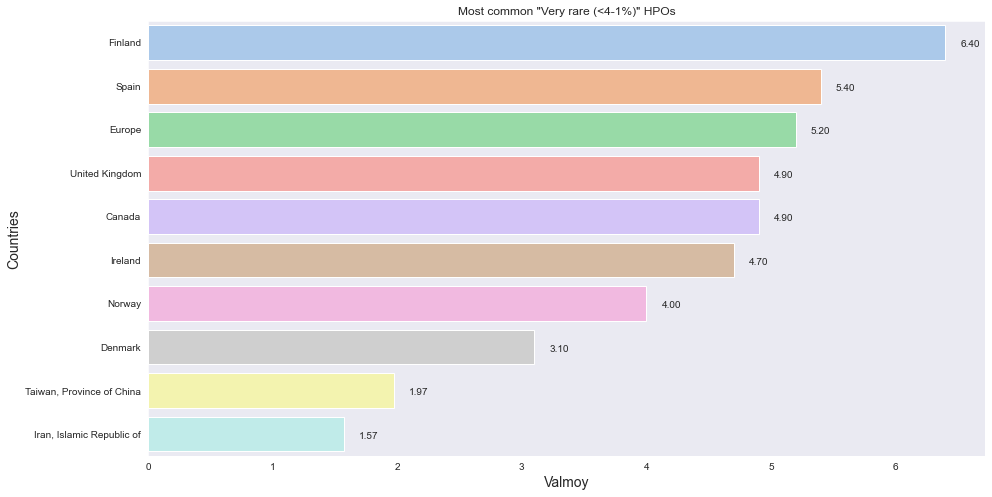

In [37]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
 
plt.figure(figsize=(15,8))

ww = sns.barplot(x = "ValMoy", y = "Prevalence_geo", data = df_2, palette = 'pastel')

for p in ww.patches:
    width = p.get_width()
    plt.text(0.2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

plt.xlabel("Valmoy", size=14)
plt.ylabel("Countries", size=14) 
plt.title('Most common "Very rare (<4-1%)" HPOs')

plt.show()